In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [13]:
from tensorflow.keras.datasets import fashion_mnist

In [34]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

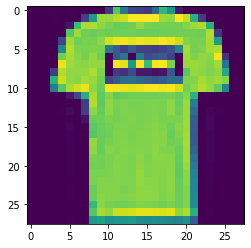

In [35]:
plt.imshow(x_train[1])

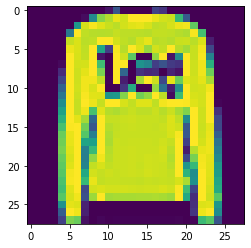

In [36]:
plt.imshow(x_test[1])

In [37]:
x_test = x_test/255
x_train = x_train/255

In [38]:
x_test.max()

1.0

In [39]:
x_test.shape

(10000, 28, 28)

In [50]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [51]:
from tensorflow.keras.utils import to_categorical

In [52]:
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [53]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [73]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [74]:
model.fit(x_train, y_train_categorical,validation_data=(x_test, y_test_categorical), epochs=4, callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 44s 732us/sample - loss: 0.0934 - acc: 0.9653 - val_loss: 0.3083 - val_acc: 0.9126
Epoch 2/4
60000/60000 [==============================] - 44s 737us/sample - loss: 0.0822 - acc: 0.9695 - val_loss: 0.3239 - val_acc: 0.9127


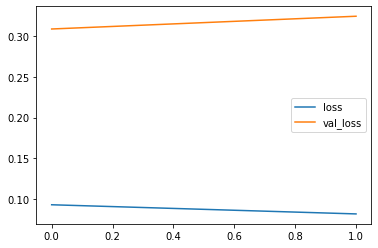

In [75]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [76]:
predictions = model.predict_classes(x_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1029
           1       0.98      0.99      0.99       989
           2       0.86      0.87      0.86       988
           3       0.92      0.92      0.92       999
           4       0.85      0.88      0.86       968
           5       0.99      0.98      0.98      1010
           6       0.74      0.76      0.75       977
           7       0.98      0.94      0.96      1047
           8       0.99      0.95      0.97      1043
           9       0.94      0.99      0.96       950

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [78]:
print(confusion_matrix(predictions, y_test))

[[878   1  17  14   1   0 117   0   1   0]
 [  1 980   0   4   1   0   3   0   0   0]
 [ 16   0 856   9  61   0  46   0   0   0]
 [ 16  12   9 915  24   0  22   0   1   0]
 [  3   4  46  20 847   0  48   0   0   0]
 [  2   0   0   1   0 989   0   9   2   7]
 [ 71   1  68  31  62   0 744   0   0   0]
 [  0   0   0   0   0   7   0 985   1  54]
 [ 12   2   3   6   4   0  20   0 995   1]
 [  1   0   1   0   0   4   0   6   0 938]]


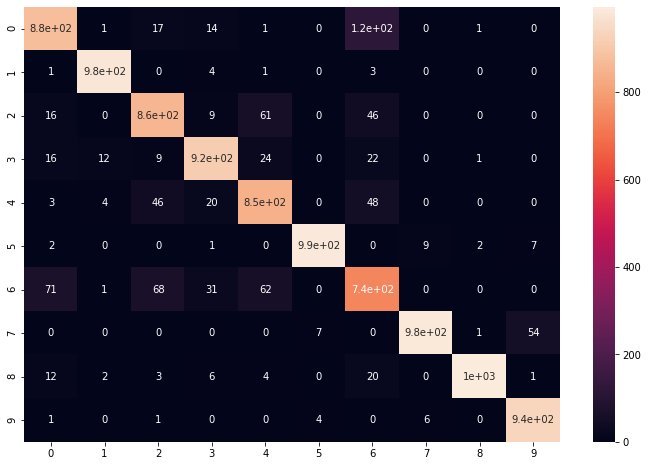

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(predictions, y_test), annot=True)